In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [2]:
y_hat = tf.constant(36,name='y_hat')
y = tf.constant(39,name='y')

loss = tf.Variable((y-y_hat)**2,name='loss')

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(loss))

9


In [6]:
a = tf.constant(5,dtype = 'int64')
b = tf.constant(10,dtype ='int64')
c = tf.multiply(a,b)
print(c)
sess = tf.Session()
print(sess.run(c))

Tensor("Mul_1:0", shape=(), dtype=int64)
50


In [7]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(5 * x, feed_dict = {x: 10}))
sess.close()


50


In [21]:
def linear_function():
    
    np.random.seed(1)
    
    X = tf.constant(np.random.randn(3,1),name = 'X')
    W = tf.constant(np.random.randn(4,3),name = 'W')
    b = tf.constant(np.random.randn(4,1),name = 'b')
    Y = tf.add(tf.matmul(W, X), b)
    
    sess = tf.Session()
    result = sess.run(Y)
    
    sess.close()
    
    return result
    
    

In [22]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [24]:
def sigmoid(z):
    
    x = tf.placeholder(tf.float32,name = 'x')
    
    sigmoid = tf.sigmoid(x)
    
    with tf.Session() as session:
        result = session.run(sigmoid,feed_dict = {x: z})
        
        
    return result    

In [26]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.999994


In [29]:
def cost(logits,labels):
    
    z = tf.placeholder(tf.float32,name = 'z')
    y = tf.placeholder(tf.float32,name = 'y') 
    
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z,labels = y)
    
    sess = tf.Session()
    
    cost = sess.run(cost,feed_dict = {z:logits,y:labels})
    
    sess.close()
    
    return cost

In [30]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [ 1.00538719  1.03664088  0.41385433  0.39956614]


In [35]:
def one_hot_matrix(labels,C):
    
    C = tf.constant(C,name = 'C')
    
    one_hot_matrix = tf.one_hot(indices = labels,depth = C,axis = 0)
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    
    
    return one_hot

In [36]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


In [37]:

# GRADED FUNCTION: ones

def ones(shape):
    
    ones = tf.ones(shape)
    
   
    sess = tf.Session()
    
    
    ones = sess.run(ones)
    
    
    sess.close()
    
    
    return ones

In [38]:
print ("ones = " + str(ones([3])))

ones = [ 1.  1.  1.]


In [39]:

# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


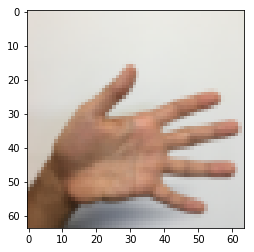

In [40]:

# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [41]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [48]:
def create_placeholders(n_x,n_y):
    
    X = tf.placeholder(tf.float32, shape=[n_x, None], name='X')
    Y = tf.placeholder(tf.float32, shape=[n_y, None], name='Y')
    return X,Y

In [49]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_9:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


In [50]:
def initialize_parameters():
    
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1)) 
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1)) 
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1)) 
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    
    parameters = {
                    "W1" : W1,
                    "b1" : b1,
                    "W2" : W2,
                    "b2" : b2,
                    "W3" : W3,
                    "b3" : b3,
    }
    
    return parameters

In [51]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [52]:
def forward_propagation(X,parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X), b1)
    A1 = tf.nn.relu(Z1)
    
    Z2 = tf.add(tf.matmul(W2,A1), b2)
    A2 = tf.nn.relu(Z2)
    
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    A3 = tf.nn.relu(Z3)
    
    return Z3

In [53]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [54]:
def compute_cost(Z3,Y):
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels = labels))
    
    return cost

In [55]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [60]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    X,Y = create_placeholders(n_x,n_y)
    parameters = initialize_parameters()
    
    z3 = forward_propagation(X,parameters)
    
    cost = compute_cost(z3,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            
            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                
                (minibatch_X, minibatch_Y) = minibatch
                
                
                _ , minibatch_cost = sess.run([optimizer, cost], 
                                             feed_dict={X: minibatch_X, 
                                                        Y: minibatch_Y})
               
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters
    

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572915
Cost after epoch 400: 0.468685
Cost after epoch 500: 0.381068
Cost after epoch 600: 0.313809
Cost after epoch 700: 0.254146
Cost after epoch 800: 0.203801
Cost after epoch 900: 0.166393
Cost after epoch 1000: 0.141141
Cost after epoch 1100: 0.107718
Cost after epoch 1200: 0.086261
Cost after epoch 1300: 0.060924
Cost after epoch 1400: 0.050927


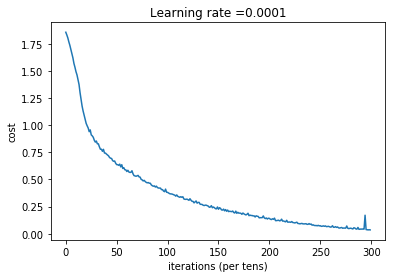

Parameters have been trained!


ValueError: Tensor("ArgMax:0", shape=(?,), dtype=int64) must be from the same graph as Tensor("ArgMax:0", shape=(?,), dtype=int64).

In [61]:
parameters = model(X_train, Y_train, X_test, Y_test)